<a href="https://colab.research.google.com/github/jose-izv/PIA_Zalando/blob/main/PIA_Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

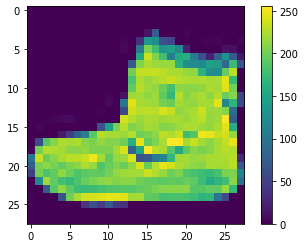

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

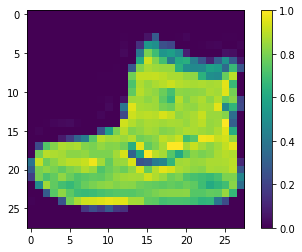

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

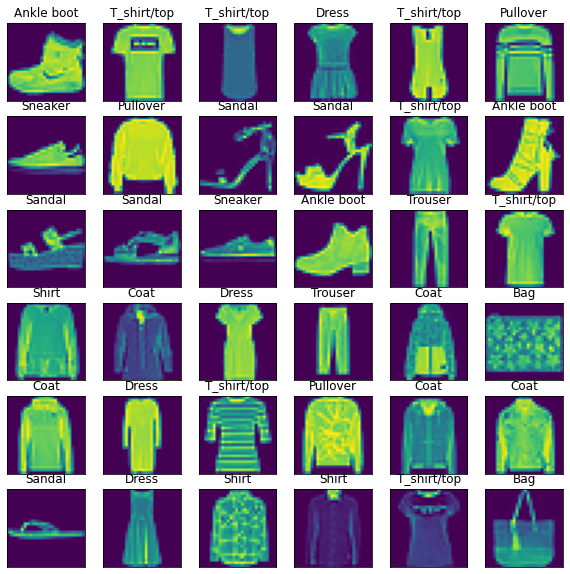

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

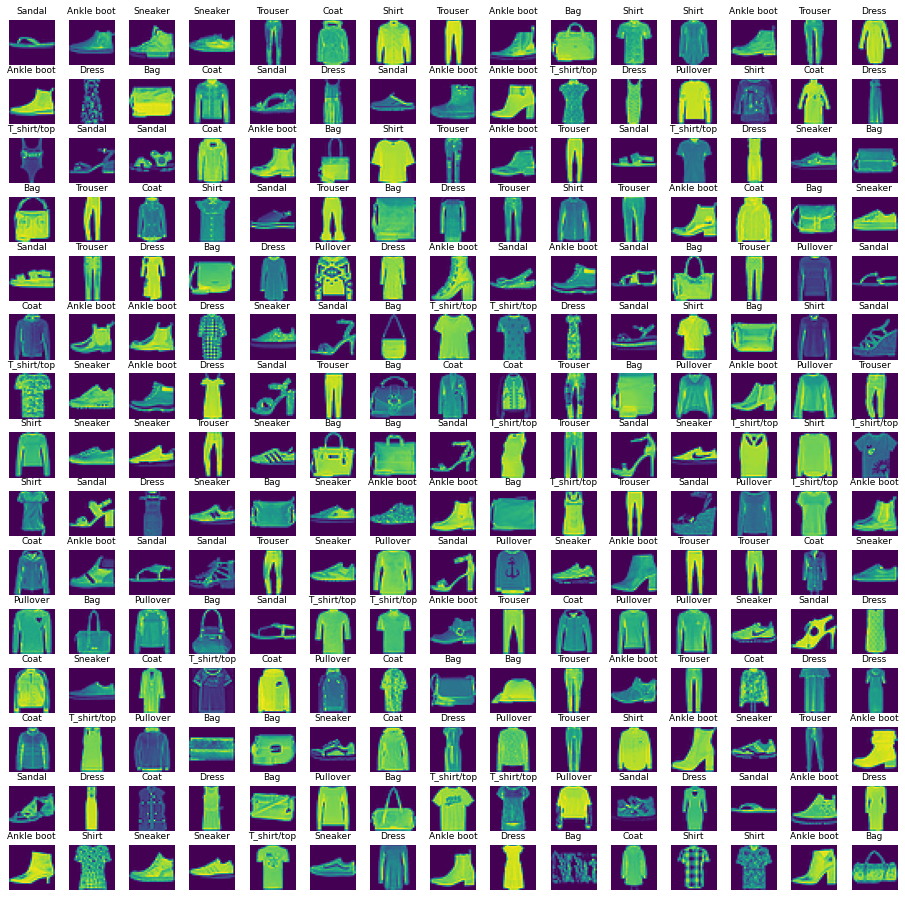

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel()
n_train = len(train_images)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_train)  
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [12]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
model = Sequential()
input_shape=train_images.shape[1:]
print(f"input_shape={train_images.shape[1:]}")
model.add(Flatten(input_shape=input_shape))

model.add(Dense(len(class_names)*4, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(len(class_names)*2, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(len(class_names), activation='softmax', kernel_initializer='glorot_uniform'))

optimizer = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='accuracy', patience=18, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, mode='min', min_lr=0.0001, verbose=1)

input_shape=(28, 28)


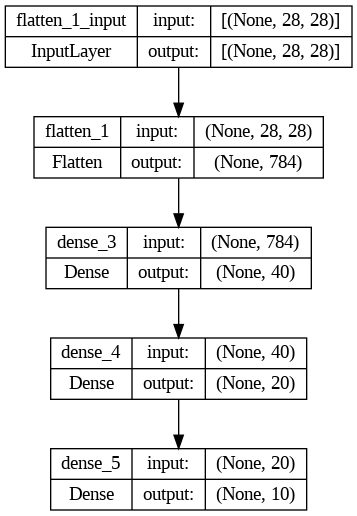

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [14]:
multi_train_labels = np.zeros((len(train_labels), 10), dtype=np.uint8)

for i in range(len(train_labels)):
    multi_train_labels[i, train_labels[i]] = 1

multi_test_labels = np.zeros((len(test_labels), 10), dtype=np.uint8)

for i in range(len(test_labels)):
    multi_test_labels[i, test_labels[i]] = 1

In [15]:
multi_train_labels[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [16]:
multi_test_labels[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [18]:
import math
batch_size = int(math.sqrt(len(train_images)))
print(f"batch_size={batch_size}")
for callback in [early_stop, reduce_lr]:
    callback.on_train_begin()
history = model.fit(train_images, multi_train_labels, validation_data=(test_images, multi_test_labels), epochs=200, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size=244
Epoch 1/200
246/246 [==============================] - 1s 5ms/step - loss: 0.1967 - accuracy: 0.9276 - val_loss: 0.4795 - val_accuracy: 0.8694 - lr: 1.0000e-04
Epoch 2/200
246/246 [==============================] - 1s 5ms/step - loss: 0.1968 - accuracy: 0.9274 - val_loss: 0.4803 - val_accuracy: 0.8693 - lr: 1.0000e-04
Epoch 3/200
246/246 [==============================] - 1s 5ms/step - loss: 0.1966 - accuracy: 0.9274 - val_loss: 0.4800 - val_accuracy: 0.8699 - lr: 1.0000e-04
Epoch 4/200
246/246 [==============================] - 1s 5ms/step - loss: 0.1967 - accuracy: 0.9275 - val_loss: 0.4812 - val_accuracy: 0.8704 - lr: 1.0000e-04
Epoch 5/200
246/246 [==============================] - 1s 6ms/step - loss: 0.1966 - accuracy: 0.9276 - val_loss: 0.4798 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 6/200
246/246 [==============================] - 2s 8ms/step - loss: 0.1965 - accuracy: 0.9277 - val_loss: 0.4813 - val_accuracy: 0.8688 - lr: 1.0000e-04
Epoch 7/200
246/246 [====

In [19]:
_, accuracy = model.evaluate(test_images, multi_test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.8672
Accuracy: 86.72


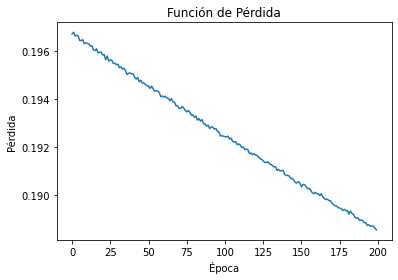

In [20]:
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

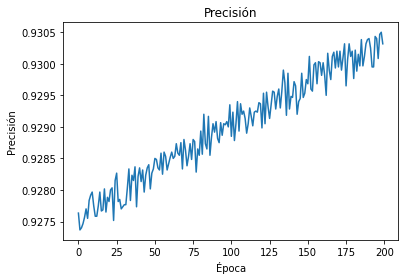

In [21]:
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()